In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/covid19_nyt
!ls


sample_data/


In [10]:
#! cd C:\Users\andtu\PycharmProjects\covid19_nyt

#%config IPCompleter.greedy=True

# %matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns

# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


import io
import requests

import time
import datetime

import os
import sys

sys.path.append(os.getcwd())

print(os.getcwd())
#! git clone https://github.com/datamade/census C:\Users\andtu\PycharmProjects\covid19_nyt\census
#! git clone https://github.com/nytimes/covid-19-data C:\Users\andtu\PycharmProjects\covid19_nyt\covid-19-data
#! git clone https://github.com/unitedstates/python-us C:\Users\andtu\PycharmProjects\covid19_nyt\us

! wget https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-states.jsonaster/examples/data/us-states.json



/content/drive/My Drive/covid19_nyt


In [0]:
url_nyt_by_state  = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
url_nyt_by_county = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"

df_nyt_by_state  = pd.read_csv( url_nyt_by_state)
df_nyt_by_county = pd.read_csv( url_nyt_by_county)

print(df_nyt_by_state.head())

print(df_nyt_by_county.head())

states   = list( sorted(set(df_nyt_by_state['state'])))
counties = list( sorted(set(df_nyt_by_county['county'])))

dates_all = list( sorted(set(df_nyt_by_state['date'])))

dates_all = ['01-' + str(i) for i in range(15,22)] +  [ d[5:] for d in dates_all]  
print(dates_all)


print(states, len(states))
print(counties[:10], len(counties))

print(dates_all)
# fips_states   = list( set(df_nyt_by_state.loc['state','fips']))
# fips_counties = list( set(df_nyt_by_county.loc['county', 'fips']))
fips_codes_state  = {state : df_nyt_by_state[df_nyt_by_state['state']==state].fips.iloc[0] for state in states}
fips_codes_county = {county : df_nyt_by_county[df_nyt_by_county['county']==county].fips.iloc[0] for county in counties}
print(fips_codes_state)
#df_nyt_by_state[df_nyt_by_state['state']=='Alabama'].fips.iloc[0]

 

In [0]:
print(states)

df = pd.read_csv('acs2017_census_tract_data.csv')
df = df.loc[:,['State', 'TotalPop']]
df_pop = df.groupby('State').sum()
#print(df_pop)
states_pop = list(df_pop.index)
set(states).intersection(set (states_pop) )

In [0]:
df = pd.read_csv('acs2017_census_tract_data.csv')
df = df.loc[:,['State', 'TotalPop']]
df_pop = df.groupby('State').sum()
#print(df_pop)
states_pop = list(df_pop.index)
set(states).intersection(set (states_pop) )

In [0]:
state_geo =  'us-states.json'
 
import folium
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=df_pop.reset_index(),
 columns=['State', 'TotalPop'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='X'
)
folium.LayerControl().add_to(m)
m

In [400]:
df = df_nyt_by_state.copy()
field = 'state' 


cases_new = pd.DataFrame(0, index=dates_all, columns=states)
cases_last14 = pd.DataFrame(0, index=dates_all, columns=states)

onset_date = pd.DataFrame(0, index=states, columns=['date'])
onset_day  = pd.DataFrame(0, index=states, columns=['day'])

final_cumsum = pd.DataFrame(0, index=states, columns=['cumsum'])
final_last14 = pd.DataFrame(0, index=states, columns=['last14'])
final_new = pd.DataFrame(0, index=states, columns=['new'])

for s in states:
    dates = np.array(  [ d[5:] for d in df[df[field]==s].date ])
    cases = np.diff(np.array(df[df[field]==s].cases), prepend=0 )
    #cases14 = np.convolve(cases,np.ones(14,dtype=int),'same')
    #deaths = np.diff(np.array( df[df[field]==s].deaths), prepend=0 )
    for i, d in enumerate(dates):
        cases_new.loc[d,s] = cases[i]
        #cases_last14.loc[dates,s] =  cases14[i]
    cases_last14.loc[:,s] = np.convolve(cases_new.loc[:,s],np.ones(14,dtype=int)/14,'same')
    
    try:
      onset = cases_new[s].to_numpy().nonzero()[0][0].astype('int')
      onset_day.loc[s] = onset
      onset_date.loc[s] = dates_all[onset]
    except:
      onset = None
      onset_day.loc[s] = None
      onset_date.loc[s] = None
 
      
    
    final_cumsum.loc[s] = np.array(df[df[field]==s].cases)[-1]
    final_last14.loc[s] = cases_last14.loc[dates_all[-1],s]
    final_new.loc[s] = cases_new.loc[dates_all[-1],s]
    
cases_cumsum = cases_new.cumsum()
#deaths_cumsum = deaths_new.cumsum()

#cases_last14 = 
#np.array(dates_all)[np.nonzero(cases_new['California'])]
#dates_all[ np.nonzero(cases_new['California'])[0] ]

cases_new_state = cases_new
cases_cumsum_state = cases_cumsum
cases_last14_state = cases_last14
#deaths_cumsum_state = deaths_cumsum
#cases_new['California']

print(1)
    



1


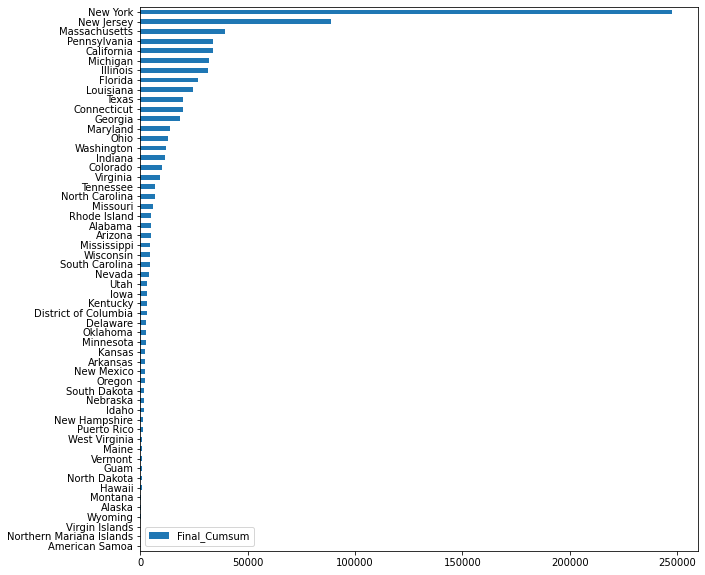

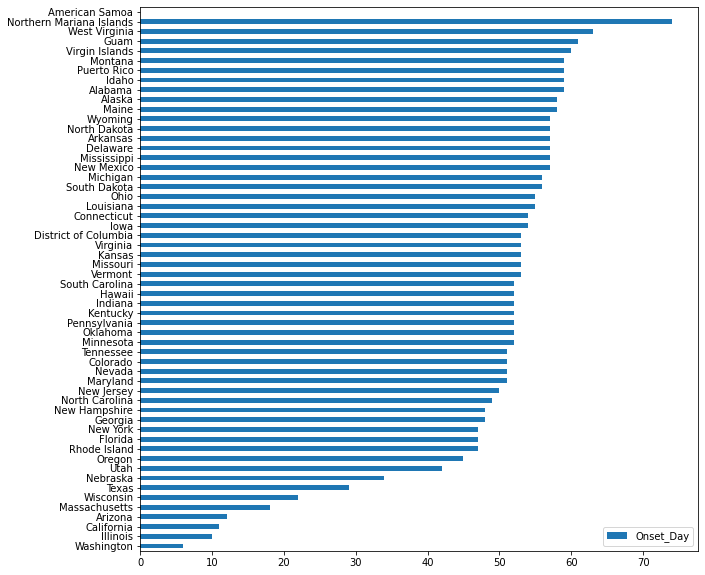

In [166]:
_ =final_cumsum.sort_values(by='Final_Cumsum').plot(kind='barh',figsize=(10,10))
_ = onset_day.sort_values(by='Onset_Day').plot(kind='barh',figsize=(10,10), )

In [298]:
# print(onset_day)
s = 'California'
#np.nonzero(
#cases_new['California'].to_numpy().nonzero()[0][0]
#final_cumsum #.loc[s,0]
#final_cumsum = pd.DataFrame(0, index=states, columns=['Final_Cumsum'])
final_cumsum.loc['California']

cumsum    33862
Name: California, dtype: int64

In [401]:
stayhome0 = {
    '2020-03-15': ['Puerto Rico'],
    '2020-03-19': ['California'],
    '2020-03-21': ['Illinois', 'New Jersey'],
    '2020-03-22': ['New York'],
    '2020-03-23': ['Connecticut', 'Louisiana', 'Ohio', 'Oregon', 'Washington'],
    '2020-03-24': ['Delaware', 'Indiana', 'Massachusetts', 'Michigan', 'New Mexico', 'West Virginia'],
    '2020-03-25': ['Hawaii', 'Idaho', 'Vermont', 'Wisconsin'],
    '2020-03-26': ['Colorado', 'Kentucky'],
    '2020-03-27': ['Minnesota', 'New Hampshire'],
    '2020-03-28': ['Alaska', 'Montana', 'Oklahoma', 'Rhode Island'],
    '2020-03-30': ['Kansas', 'Maryland', 'North Carolina', 'Virginia', 'Utah'], 
    '2020-03-31': ['Arizona', 'Tennessee'],
    '2020-04-01': ['District of Columbia', 'Nevada', 'Pennsylvania'],
    '2020-04-02': ['Maine', 'Texas'],
    '2020-04-03': ['Florida', 'Georgia', 'Missouri', 'Mississippi'],
    '2020-04-04': ['Alabama' ] ,
    '2020-04-07':  ['South Carolina' ] 
}

stayhome = pd.DataFrame({ 'date' : None, 'day' : None,}, index = states)

#print(stayhome)

for k in stayhome0.keys():
    #print(k)
    #print(stayhome0[k])
    date0 = k[5:]
    order_date0 = date0
    day0 = dates_all.index(date0)
    for s in stayhome0[k]:
        #print(s)
        stayhome.loc[s, 'date'] = date0
        stayhome.loc[s, 'day' ] = day0
    
for s in states:
    onset_day0 =  onset_day.loc[s, 'day' ]
    onset_date0 =  onset_date.loc[s,'date' ]
    
   # stayhome.loc[s, 'final_sum'] = cases_cumsum.tail(1)[s].iloc[0]
   # stayhome.loc[s, 'last14'] = cases_last14.tail(1)[s].iloc[0]

    stayhome.loc[s,'onset_day'] = onset_day0
    stayhome.loc[s,'onset_date'] = onset_date0
    try:
      stayhome.loc[s,'cumsum'] = cases_cumsum_state[s].loc[stayhome.loc[s, 'date']]
      stayhome.loc[s,'cumsum_post14'] = cases_cumsum_state[s].loc[dates_all[stayhome.loc[s, 'day']+14]]
    except:
      pass
    # try:
    #     # print(s)
        
    #     #stayhome.loc[s,'prior14'] = cases_last14.loc[dates_all[dates_all.index(onset_date0)-1],s]
    #     #stayhome.loc[s,'past14']  = cases_last14.loc[dates_all[dates_all.index(onset_date0)+14],s]
    #     stayhome.loc[s,'onset_post14'] =  cases_last14.loc[dates_all[dates_all.index(onset_date0)+14],s]
    #     stayhome.loc[s,'growth_onset'] =  cases_last14.loc[dates_all[dates_all.index(onset_date0)+28],s]  - cases_last14.loc[dates_all[dates_all.index(onset_date0)+14],s]
    # except:
    #     pass
    
    # try:
    #     stayhome.loc[s,'order_post14'] =  cases_last14.loc[dates_all[dates_all.index(order_date0)+14],s]
    #     stayhome.loc[s,'order_post14'] =  cases_last14.loc[dates_all[dates_all.index(order_date0)],s]
    #     stayhome.loc[s,'order_pre_post'] =  cases_last14.loc[dates_all[dates_all.index(onset_date0)+14],s]  - cases_last14.loc[dates_all[dates_all.index(onset_date0)+14],s]
    #     stayhome.loc[s,'order_pre_last14'] =  cases_last14.loc[dates_all[dates_all.index(dates_all[-1])],s]  - cases_last14.loc[dates_all[dates_all.index(onset_date0)+14],s]
    # except:
    #    pass 

# stayhome.sort_values(by='date')

print(stayhome)

                           date   day  ...   cumsum cumsum_post14
Alabama                   04-04    81  ...   1633.0        4723.0
Alaska                    03-28    74  ...    102.0         255.0
American Samoa             None  None  ...      NaN           NaN
Arizona                   03-31    77  ...   1298.0        3806.0
Arkansas                   None  None  ...      NaN           NaN
California                03-19    65  ...   1067.0       11190.0
Colorado                  03-26    72  ...   1432.0        6202.0
Connecticut               03-23    69  ...    415.0        6906.0
Delaware                  03-24    70  ...    104.0         928.0
District of Columbia      04-01    78  ...    586.0        2197.0
Florida                   04-03    80  ...  10260.0       24745.0
Georgia                   04-03    80  ...   5967.0       16658.0
Guam                       None  None  ...      NaN           NaN
Hawaii                    03-25    71  ...     95.0         433.0
Idaho     

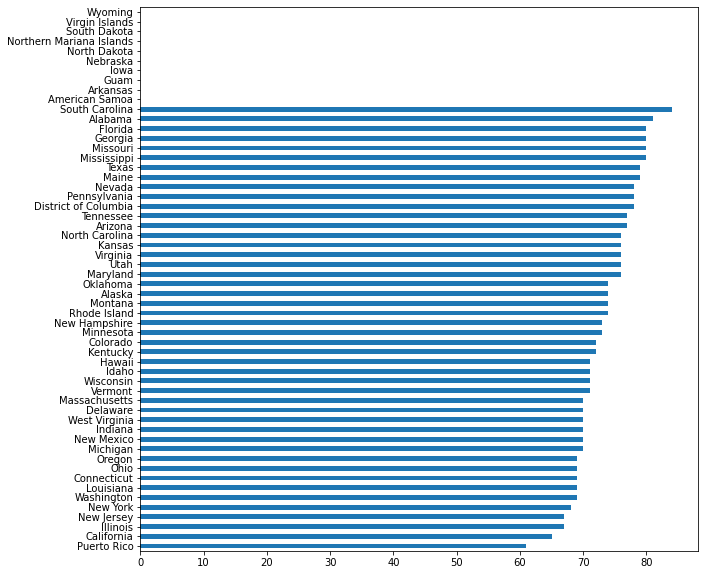

In [300]:
_ =stayhome['day'].sort_values().plot(figsize=(10,10), kind='barh', \
                                      title='Number o')

In [0]:
df = df_nyt_by_county.copy()
field = 'county'
cases_new = pd.DataFrame(0, index=dates_all, columns=counties)
deaths_new = pd.DataFrame(0, index=dates_all, columns=counties)

for s in counties:
    #dates = np.array(df[df[field]==s].date)
    dates = np.array(  [ d[5:] for d in df[df[field]==s].date ])
    cases = np.diff(np.array(df[df[field]==s].cases), prepend=0 )
    deaths = np.diff(np.array( df[df[field]==s].deaths), prepend=0 )
    for i, d in enumerate(dates):
        cases_new.loc[d,s] = cases[i]
        deaths_new.loc[dates,s] =  deaths[i]

cases_cumsum = cases_new.cumsum()
deaths_cumsum = deaths_new.cumsum()

cases_new_county = cases_new
cases_cumsum_county = cases_cumsum
deaths_new_county = deaths_new
deaths_cumsum_county = deaths_cumsum

# np.array(dates_all)[np.nonzero(cases_new['California'])]

In [0]:
ax = cases_cumsum_state.rename_axis('date').plot()
#print(ax)
#cases_cumsum_state['California'].plot()
#cases_cumsum_state
#figure
#cases_cumsum_county['Cook'].plot()
#ax

       new_cases_us
01-15             0
01-16             0
01-17             0
01-18             0
01-19             0


[Text(0, 0.5, '# cases'), Text(0.5, 0, 'date')]

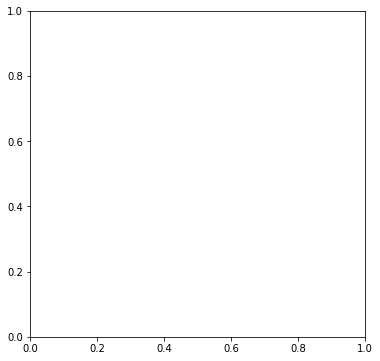

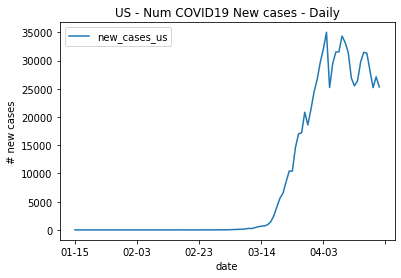

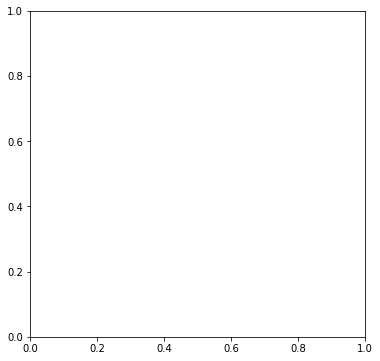

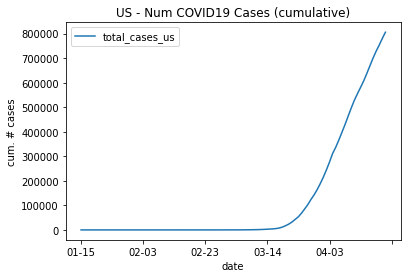

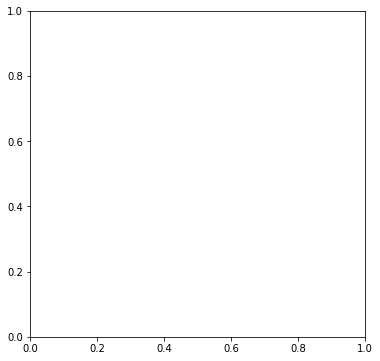

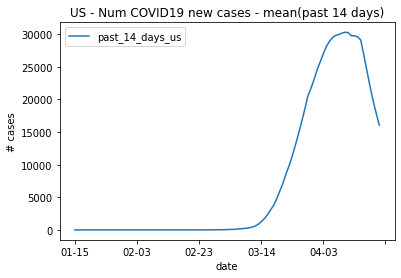

In [406]:
plt.subplots(figsize=(6,6))
cases_new_us = pd.DataFrame(cases_new_state.sum(axis=1), columns=['new_cases_us'])
#cases_new_us.rename(columns = ['date', 'us'], inplace=True)
_ = cases_new_us.plot(title='US - Num COVID19 New cases - Daily'   ) #   , legend=True)
plt.gca().set(xlabel="date", ylabel="# new cases")
#
print(cases_new_us.head())

plt.subplots(figsize=(6,6))
cases_cumsum_us = pd.DataFrame(cases_cumsum_state.sum(axis=1), columns=['total_cases_us'])
cases_cumsum_us.plot(title='US - Num COVID19 Cases (cumulative)'   ) #   , legend=True)
plt.gca().set(xlabel="date", ylabel="cum. # cases")

# cases_last14_us = pd.DataFrame(cases_last14_state.sum(axis=1), columns=['past_14_days_us'])
# cases_last14_us.plot(title='US - Num COVID19 Cases - past 14 days'   ) #   , legend=True)
# plt.gca().set(xlabel="date", ylabel="# cases")

plt.subplots(figsize=(6,6))
cases_last14_us = pd.DataFrame(cases_last14_state.sum(axis=1), columns=['past_14_days_us'])
cases_last14_us.plot(title='US - Num COVID19 new cases - mean(past 14 days)'   ) #   , legend=True)
plt.gca().set(xlabel="date", ylabel="# cases")


                            OLS Regression Results                            
Dep. Variable:         total_cases_us   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2262.
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           5.02e-69
Time:                        20:57:50   Log-Likelihood:                -135.02
No. Observations:                  99   AIC:                             274.0
Df Residuals:                      97   BIC:                             279.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3340      0.191     -6.994      0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


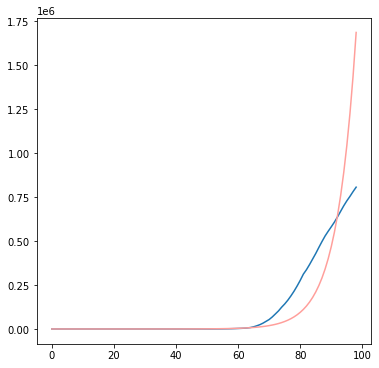

In [407]:
plt.subplots(figsize=(6,6))
y = cases_cumsum_us
logy = np.log(y)
logy[abs(logy)==np.inf]=0
x = sm.add_constant( range(len(logy)))
mod = sm.OLS(logy, x)
res = mod.fit()
print(res.summary())
const = res.params[0]
coef = res.params[1]
y_pred = np.exp(const + coef * np.arange(0,len(y)))
plt.plot(np.arange(len(y)), y)
plt.plot(np.arange(len(y)), y_pred, 'r')

In [0]:
# import seaborn as sns

f, ax = plt.subplots(figsize=(6, 15))

df = cases_cumsum_state.iloc[-1,:]
# _ = df.sort_values().plot.barh(ax=ax )
_ = df.sort_values().plot( ax=ax, kind = 'barh', )
# ax.set_xlabel('Num')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2262.
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           5.02e-69
Time:                        21:07:58   Log-Likelihood:                -135.02
No. Observations:                  99   AIC:                             274.0
Df Residuals:                      97   BIC:                             279.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3340      0.191     -6.994      0.0

[Text(0, 0.5, 'cum # cases'),
 Text(0.5, 0, '# days since 01-15'),
 Text(0.5, 1.0, 'US - Num COVID19 cum. n')]

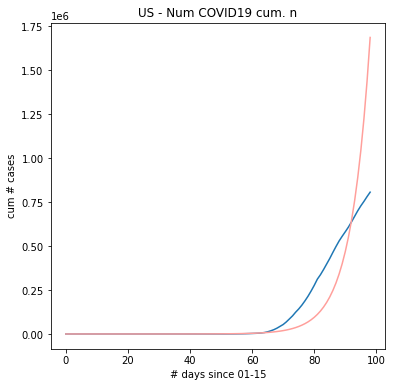

In [409]:
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

import statsmodels.api as sm

def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

y = cases_cumsum_us.total_cases_us.to_numpy()
x = np.arange(cases_cumsum_us.shape[0])

#exp_fit = curve_fit(exponential_model,x,y,p0=[1,-1,1])
#print(exp_fit)
y = cases_cumsum_us.total_cases_us.to_numpy().reshape(-1,1)
logy = cases_cumsum_us.total_cases_us.apply(np.log).to_numpy().reshape(-1,1)
logy[abs(logy)==np.inf]=0
x = sm.add_constant( range(len(logy)))
#df = pd.DataFrame({'x0':np.ones(len(logy),1), 'x':range(len(logy))})
df = pd.DataFrame(np.hstack((logy,x)))
mod = sm.OLS(logy, x)
res = mod.fit()
print(res.summary())
const = res.params[0]
coef = res.params[1]
y_pred = np.exp(const + coef * np.arange(0,len(y)))

plt.subplots(figsize=(6,6))
plt.plot(np.arange(len(y)), y)
plt.plot(np.arange(len(y)), y_pred, 'r')

plt.gca().set(xlabel="# days since 01-15", ylabel="cum # cases", 
              title = 'US - Num COVID19 cum. n'   )

In [304]:
y = cases_cumsum_us.total_cases_us.to_numpy()
x = np.arange(cases_cumsum_us.shape[0])

try:
    exp_fit = curve_fit(exponential_model,x,y,p0=[1,-1,1])
    print(exp_fit)
except:
    print('!!')

(array([ 120.78812174,   -0.93461788, -119.73122775]), array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]]))


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 28.45313421,   0.05808601, -10.57687578]), array([[1.29758949e+14, 6.95479540e+03, 7.85119494e+13],
       [6.95479579e+03, 5.88164552e-06, 4.20807816e+03],
       [7.85119494e+13, 4.20807792e+03, 4.75044400e+13]]))


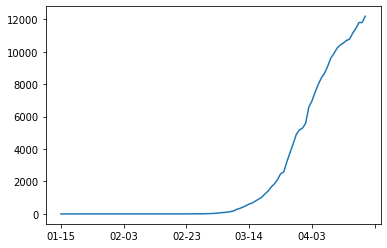

In [151]:
ts = cases_cumsum_state['Washington']
ts.plot()
y = ts.to_numpy()
x = np.arange(y.shape[0])
exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1])
print(exp_fit)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     935.9
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.77e-37
Time:                        21:47:14   Log-Likelihood:                -26.691
No. Observations:                  60   AIC:                             57.38
Df Residuals:                      58   BIC:                             61.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4971      0.098     15.289      0.0

[Text(0, 0.5, 'cum # cases blue: actual, red: predicted'),
 Text(0.5, 0, '# days since 01-15'),
 Text(0.5, 1.0, 'Nebraska')]

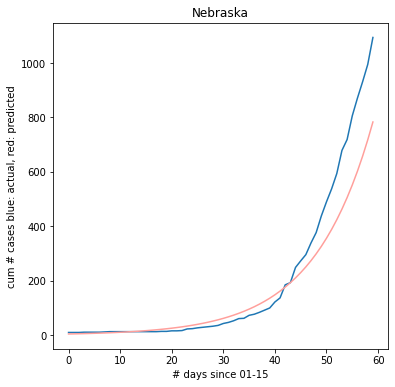

In [424]:

s =   'Nebraska'

day_onset = onset_day.loc[s].to_numpy()
day_stayhome = stayhome.loc[s].day

days = day_onset + range(60)

y = cases_cumsum_state[s].iloc[days].to_numpy().reshape(-1,1)
logy = np.log(y)
logy[abs(logy)==np.inf]=0
x = sm.add_constant( range(len(logy)))
mod = sm.OLS(logy, x)
res = mod.fit()
print(res.summary())
const = res.params[0]
coef = res.params[1]
y_pred = np.exp(const + coef * np.arange(0,len(y)))

plt.subplots(figsize=(6,6))
plt.plot(np.arange(len(y)), y)
plt.plot(np.arange(len(y)), y_pred, 'r')

plt.gca().set(xlabel="# days since 01-15", \
              ylabel="cum # cases blue: actual, red: predicted", title = s  )



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     2274.
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           3.15e-48
Time:                        19:10:01   Log-Likelihood:                -40.094
No. Observations:                  60   AIC:                             84.19
Df Residuals:                      58   BIC:                             88.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4369      0.122     -3.569      0.0

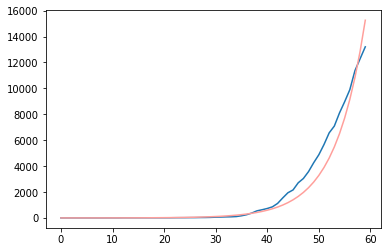

In [328]:
s =   'Texas'

day_onset = onset_day.loc[s].to_numpy()
day_stayhome = stayhome.loc[s].day

days = day_onset + range(60)

y = cases_cumsum_state[s].iloc[days].to_numpy().reshape(-1,1)

logy = np.log(y)
logy[abs(logy)==np.inf]=0
x = sm.add_constant( range(len(logy)))
mod = sm.OLS(logy, x)
res = mod.fit()
print(res.summary())
const = res.params[0]
coef = res.params[1]
y_pred = np.exp(const + coef * np.arange(0,len(y)))
plt.plot(np.arange(len(y)), y)
plt.plot(np.arange(len(y)), y_pred, 'r')

44


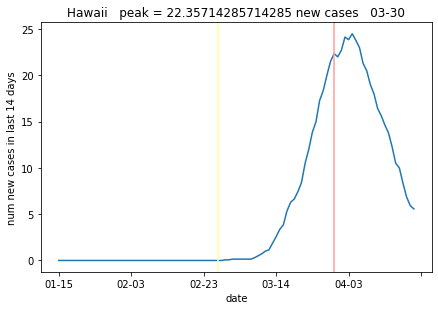

In [433]:
from scipy.signal import find_peaks

#plt.subplots(figsize=(6,6))
s = 'Hawaii'
ts = cases_last14[s]
_ = ts.plot()

peak = find_peaks(x=ts)[0][0] # (x=ts, height=100, distance=20, prominence=5 )[0][0]
# print(peak)

# f_prime = np.gradient (ts) # differential approximation
inflections = np.where(np.diff(np.sign (np.gradient (ts))))[0]

# ix_ = 0
ix_ = np.argmin(np.abs(inflections-np.median(inflections))) - 1 
inflection = inflections[ix_]

y_inf = ts[inflection]
y_pk = ts[peak]
t_inf_pk = peak - inflection

print(inflection)
_ = plt.axvline(x=peak, color='r')
_ = plt.axvline(x=inflection, color='y')

plt.tight_layout()
plt.title(s + '   ' + 'peak = ' + str(y_pk) + ' new cases   ' +  dates_all[peak])
plt.xlabel('date')
plt.ylabel('num new cases in last 14 days')
# plt.legend(s)
left, right = plt.xlim()



Alabama
86 86 3135 3135 0
Alaska
78 78 169 169 0
Arizona
88 43 1 2738 45
Arkansas
91 87 937 1044 4
California
91 23 5 17578 68
Colorado
84 47 8 5063 37
Connecticut
91 46 0 12909 45
Delaware
91 53 4 1962 38
District of Columbia
91 51 10 1830 40
Florida
84 39 0 15317 45
Georgia
91 82 9814 10889 9
Hawaii
81 48 2 343 33
Idaho
81 55 5 1166 26
Illinois
91 18 1 19246 73
Indiana
90 83 6414 6799 7
Iowa
91 46 0 2229 45
Kansas
91 50 1 1178 41
Kentucky
91 44 0 1993 47
Louisiana
83 47 0 17055 36
Maine
85 82 405 431 3
Maryland
91 45 3 9639 46
Massachusetts
91 26 0 25806 65
Michigan
82 82 19218 19218 0
Minnesota
91 83 1117 1484 8
Mississippi
91 49 0 2774 42
Missouri
84 50 1 3338 34
Montana
77 51 0 274 26
Nebraska
91 40 13 1210 51
Nevada
85 49 4 2024 36
New Hampshire
88 48 4 747 40
New Jersey
85 85 50128 50128 0
New Mexico
91 49 0 1285 42
New York
86 83 129126 129890 3
North Carolina
90 44 1 3908 46
North Dakota
91 81 210 402 10
Ohio
91 47 0 8469 44
Oklahoma
85 48 1 1618 37
Oregon
80 45 2 1005 35
Penn

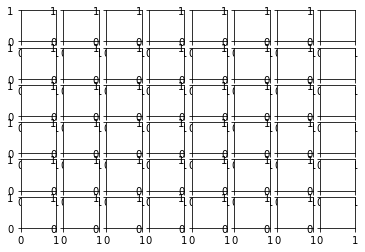

In [363]:
fig, axs = plt.subplots(nrows=6, ncols=8)

res_peak = dict();

for i, s in enumerate(states_pop):
  print(s)
  ts = cases_last14[s]
  #_ = ts.plot()

  peak = find_peaks(x=ts, height=100, distance=20, prominence=5 )[0][0]
  

  # f_prime = np.gradient (ts) # differential approximation
  inflections = np.where(np.diff(np.sign (np.gradient (ts))))[0]
  ix_ = np.argmin(np.abs(inflections-np.median(inflections)))
  inflection = inflections[ix_]


  y_inf = ts[inflection]
  y_pk = ts[peak]
  t_inf_pk = peak - inflection

  print(peak, inflection, y_inf, y_pk, t_inf_pk)
  res_peak[s] = peak, inflection, y_inf, y_pk, t_inf_pk

  # x = np.arange(0,len(y))
  # y = ts.to_frame().to_numpy()

  # ax  = axs[i]
  # if i == 1:
  #    _ = ts.plot()
  # else:
  #   _ = ts.plot(ax=ax)
  # # _ = plt.plot( x, y, ax=ax)
  # _ = plt.axvline(ax=ax, x=peak, color='r')
  # _ = plt.axvline(ax=ax, x=inflection, color='y')

  #plt.tight_layout()
  #left, right = plt.xlim()


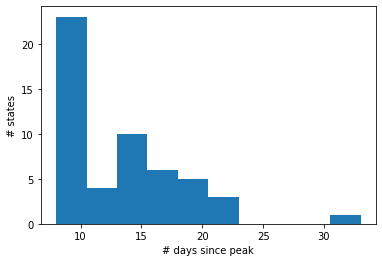

In [454]:
days_pk = [  99-res_peak[s][0] for s in states_pop ]
plt.hist(days_pk, bins=10)
plt.gca().set(xlabel="# days since peak", \
              ylabel='# states')

import scipy.stats

In [430]:


s = 'Wisconsin'
#y = cases_last14[s]
y = cases_cumsum_state[s].iloc[days].to_numpy().reshape(-1,1)
x = np.arange(0,len(y))

from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import scipy.optimize as optim

def my_logistic(t, a, b, c):
    return c / (1 + a * np.exp(-b*t))
p0 = np.random.exponential(size=3) 
bounds = (0, [100000., 3., 1000000000.])

(a,b,c),cov = optim.curve_fit(my_logistic, x, y, bounds=bounds, p0=p0)
print( a,b, c ) 

y_pred = my_logistic(x, a,b,c).reshape(-1,1)
# fit = curve_fit(logistic_model,x,y,p0=[2,100,20000])   
# print(fit)

plt.subplots(figsize=(6,6))



plt.plot(np.arange(len(y)), y)
plt.plot(np.arange(len(y)), y_pred, 'r')

plt.gca().set(xlabel="# days since 01-15", \
              ylabel="cum # cases blue: actual, red: predicted", title = s  )


# inflection = np.where(np.diff(np.sign (np.gradient (y_pred)))) [0][0]

# y_inf = y_pred[inflection]
# y_pk = ts[peak]
# t_inf_pk = peak - inflection

# print(y_inf, y_pk, t_inf_pk)

ValueError: ignored

In [0]:
df = df_nyt_by_state.copy()
data_state = dict({})
for state in states:
    data_state[state] = {
        'fips' : df[df['state']==state].fips.iloc[0],
        'counties' : list(set(df_nyt_by_county[df_nyt_by_county['state'] == state].county )), 
        'dates' : np.array(df[df['state']==state].date),
        'cases_cum' : np.array(df[df['state']==state].cases),
        'deaths' : np.array(df[df['state']==state].deaths),
        'cases' : np.diff( np.array(df[df['state']==state].cases), prepend=0 ),
        'cases_final' : df[df['state']==state].cases.iloc[-1],
        'deaths_final' : df[df['state']==state].deaths.iloc[-1]
    }
    data_state[state]['first_case'] = np.nonzero(data_state[state]['cases_cum'])[0][0]
    data_state[state]['first_case_date'] = data_state[state]['dates'][data_state[state]['first_case']]  
                                                   
data_state['Alabama']

In [0]:
state = 'California'
data_state[state]['dates']   
[data_state[state]['cases_cum']] 
data_state[state]['first_case']
np.nonzero(data_state[state]['cases_cum'])[0]
data_state[state]['dates']

In [0]:
first_cases = [ (state, data_state[state]['first_case'], data_state[state]['first_case_date']) for state in states]
first_cases

In [0]:
df = df_nyt_by_county.copy()
data_state = dict({})
for county in counties:
    data_state[county] = {
        'fips' : df[df['county']==county].fips.iloc[0],
        'state' : df[df['county']==county].state.iloc[0],
        'dates' : np.array(df[df['county']==county].date),
        'cases_cum' : np.array(df[df['county']==county].cases),
        'deaths' : np.array(df[df['county']==county].deaths),
        'cases' : np.diff( np.array(df[df['county']==county].cases), prepend=0 ),
        'cases_final' : df[df['county']==county].cases.iloc[-1],
        'deaths_final' : df[df['county']==county].deaths.iloc[-1]
    }

In [0]:
from census import Census
from us import states

c = Census("MY_API_KEY")
c.acs5.get(('NAME', 'B25034_010E'),
          {'for': 'state:{}'.format(states.MD.fips)})

In [0]:
from scipy.stats import spearmanr

In [461]:
days_pk = np.array([  99-res_peak[s][0] for s in states_pop ])
sh = np.array([  99-stayhome.loc[s,d].day for s in states_pop ])
plt.hist(days_pk, bins=10)
plt.gca().set(xlabel="# days since peak", \
              ylabel='# states')

import scipy.stats

KeyError: ignored